# Brad Egan - https://www.linkedin.com/in/bradford-egan

## Identfying a random binary string using GA

In [ ]:
!pip install python-Levenshtein
import Levenshtein
from random import choice, randint
from math import ceil, inf
from copy import deepcopy
from itertools import groupby


class Creature():
  def __init__(self, binary=None):
    self.binary_repr = binary
    self.grade = inf
  # Private class for human to set solution
  def set_sol(self, base10):
    self.binary_repr = str(bin(base10)[2:])
  # Get binary representation
  def get_sol(self):
    return self.binary_repr
  # Get length of binary representation
  def get_sol_len(self):
    return len(self.binary_repr)
  def get_sol_base10(self):
    return int(self.binary_repr,2)
  def __str__(self):
    return self.binary_repr
  def __eq__(self,obj):
    return self.binary_repr == obj.binary_repr
  def __hash__(self):
    return hash(self.binary_repr)

class God():
  def __init__(self, creation_num=1, creature_len=8):
    self.creation_num = creation_num
    self.creature_len = creature_len
  def create_creature(self):
    random_binary = ''
    for i in range(self.creature_len):
      random_binary += choice(['0','1'])
    return Creature(binary=random_binary)
  def create_creatures(self):
    creature_list = []
    while len(creature_list) != (self.creation_num):
      creature = self.create_creature()
      if creature not in creature_list:
        creature_list.append(creature)
        print("Creature is:",creature)
    return creature_list


class Environment():
  def __init__(self, solution=42):
    # The solution to the universe
    self.solution = solution
    self.binary_sol = str(bin(self.solution)[2:])
    print('The solution to the universe:',self.solution)
    print('Random binary to find',self.binary_sol)
    print('Solution len:',len(self.binary_sol))
    # And God said, Let there be light: and there was light.
    self.god = God(creation_num=10, creature_len=len(self.binary_sol))
    self.current_creatures = self.god.create_creatures()
    self.num_creatures = len(self.current_creatures)
    print(self.num_creatures, "Creatures have been created.")
    self.iterations =0
  def __str__(self):
    cstr = ''
    for creature in self.current_creatures:
      cstr+= (" "+creature.binary_repr)
    return "Creatures are: "+cstr
  def grade_sol(self, creature):
    # creature_base10 = creature.get_sol_base10()
    # # print('Creature base10 is:',creature_base10)
    # return abs(self.solution - creature_base10)
    return Levenshtein.distance(self.binary_sol,creature.binary_repr)
  def grade_sols(self):
    for creature in self.current_creatures:
      creature.grade = self.grade_sol(creature)
    self.sort_creatures_by_grade()
      # print ('Creature grade  is:',creature.grade)
  def sort_creatures_by_grade(self):
    self.current_creatures = sorted(self.current_creatures, key=lambda x: x.grade)
    print('Sorted grades:',[creature.grade for creature in self.current_creatures], self.current_creatures[0].binary_repr,end='\r')
    # print(,end='\r')
  def natural_selection(self, percentage):
    len_env = len(self.current_creatures)
    env_cealing = ceil(percentage * len_env)
    if (env_cealing % 2) != 0:
      env_cealing -= 1
    self.current_creatures = self.current_creatures[:env_cealing]
    # print('after natural selection:')
    # for c in self.current_creatures:
    #   print(c.binary_repr)
  def crossover(self):
    split_chrom1 = []
    split_chrom2 = []
    split = randint(1,len(self.current_creatures[0].binary_repr)-2)
    for i in range(len(self.current_creatures)):
      split_chrom1.append(self.current_creatures[i].binary_repr[:split])
      split_chrom2.append(self.current_creatures[i].binary_repr[split:])
    # print('split chrom1 are',split_chrom1)
    # print('split chrom2 are',split_chrom2)
    new_creatures = []
    while len(split_chrom2) != 0:
      new_chrom1 = choice(split_chrom1)
      split_chrom1.remove(new_chrom1)
      new_chrom2 = choice(split_chrom2)
      split_chrom2.remove(new_chrom2)
      new_sol = new_chrom1+new_chrom2
      new_creatures.append(new_sol)
    new_creature_obs = []
    for c_str in new_creatures:
      new_creature_obs.append(Creature(binary=c_str))
    self.current_creatures = self.current_creatures + new_creature_obs
    # print('after crossover:')
    # for c in self.current_creatures:
      # print (c.binary_repr)
    return self.current_creatures
  def mutate_env(self):
    while len(self.current_creatures) != self.num_creatures:
      rand_creature = choice(self.current_creatures[0:4])
      mutated_rand_creature = self.mutate_creature(rand_creature, num_mutations=1)
      self.current_creatures.append(mutated_rand_creature)
    # print(self)
    # print('Num of creatures after mutation',len(self.current_creatures))
    # print('after mutation:')
    # for c in self.current_creatures:
    #   print(c.binary_repr)
  def mutate_creature(self, creature, num_mutations=2):
    creature_copy = deepcopy(creature)
    for mutation in range(num_mutations):
      random_index = randint(0,len(creature_copy.binary_repr)-1)
      lst = list(creature_copy.binary_repr)
      if creature_copy.binary_repr[random_index] == '0':
        lst[random_index] = '1'
      else:
        lst[random_index] = '0'
    creature_copy.binary_repr = "".join(lst)
    return creature_copy
  def converge(self):
    while True:
      self.grade_sols()
      if self.current_creatures[0].grade == 0:
        break
      self.natural_selection(0.2)
      self.crossover()
      self.delete_dup_creatures()
      self.mutate_env()
      self.iterations +=1
    print('FOUND SOLUTION:', self.current_creatures[0].binary_repr)
    print('IN',self.iterations,'ITERATIONS')
  def delete_dup_creatures(self):
    self.current_creatures = list(set(self.current_creatures))
    # print('after deletion:')
    # for c in self.current_creatures:
    #   print(c.binary_repr)


# Env
env = Environment(solution=942342423199999)
env.converge()

The solution to the universe: 942342423199999
Random binary to find 11010110010000111000110001011001000100000011111111
Solution len: 50
Creature is: 01010101011101000010100000001001111010100111000101
Creature is: 10111000011000110101011100001100100011010010100110
Creature is: 00111001101110001000101001101001001101000001001111
Creature is: 10111010100101111101000100101010110100100111010011
Creature is: 00100010100010001100010100101001001111110101010010
Creature is: 11010011001001000001100001100000010010111101110001
Creature is: 10001000100110000101001011111100011000100010011100
Creature is: 10011100011011010011100101010101001000111000011110
Creature is: 01100010011011000100111110101011010000001011110100
Creature is: 10010001111100011101101101110101110010001001001010
10 Creatures have been created.


KeyboardInterrupt: ignored

CONVERGING
FOUND SOLUTION:  (27, 50) (21, 43) (25, 42) (28, 36) (29, 24) (30, 18) (24, 29) (9, 29) (2, 39) (7, 40) (11, 56) (11, 64) (16, 92) (21, 94) (24, 94) (23, 84) (31, 72) (34, 68) (32, 79) (38, 92) (41, 99) (50, 86) (57, 81) (65, 92) (84, 94) (86, 90) (93, 85) (94, 80) (75, 72) (75, 48) (80, 49) (94, 49) (99, 33) (98, 28) (98, 18) (94, 10) (90, 9) (83, 1) (79, 12) (77, 13) (81, 32) (78, 22) (74, 21) (62, 17) (58, 16) (52, 3) (45, 12) (53, 22) (57, 41) (60, 56)
IN 5506 ITERATIONS
SCORE: 539.42
FINAL ITERATION: 6506


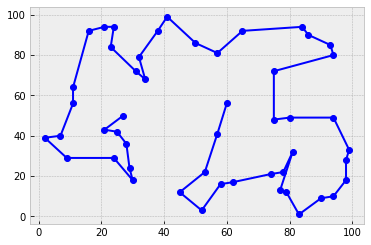

In [ ]:
from math import sqrt, inf,ceil
from random import randint
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from random import choice
from copy import deepcopy
plt.style.use('bmh')  # Use some nicer default colors

class Point():
  def __init__(self, x, y):
    self.x = x
    self.y = y
  def __str__(self):
    return '('+str(self.x)+ ', '+str(self.y)+')'
  def __repr__(self):
    return '('+str(self.x)+ ', '+str(self.y)+')'
  def __eq__(self,obj):
    return (self.x == obj.x) and (self.y == obj.y)
  def __hash__(self):
    return hash((self.x, self.y))


class Map():
  def __init__(self, map=[]):
    self.map = map
    self.score = inf
  def generate_point(self):
    return Point(randint(0,100),randint(0,100))
    # return Point(50,50)
  def generate_points(self, num):
    pt_lst = []
    while len(pt_lst) < num:
      random_pt = self.generate_point()
      if random_pt not in pt_lst:
        # print('Random point is', random_pt)
        pt_lst.append(random_pt)
    # print('Pt lst is:',pt_lst)
    self.map = pt_lst
  def add_point(self, point):
    self.map.append(Point)
  def add_points(self, point_lst):
    for point in point_lst:
      self.map.append(point)
  def get_map(self):
    return self.map
  def get_distance(self, point1, point2):
    return sqrt(((abs(point1.x-point2.x))**2) + ((abs(point1.y-point2.y))**2))
  def get_path_distance(self):
    total_distance = 0
    i=0
    while i < len(self.map)-1:
      # print('Comparing point', i, 'and point', i+1)
      total_distance +=  self.get_distance(self.map[i], self.map[i+1])
      # print('Distance so far',total_distance)
      i+=1
    self.score = total_distance
    # print ('Path Distance is:', total_distance)
    return total_distance
  def draw_map(self):
    # for point in self.map:
    #   plt.plot(point.x, point.y, '-ok', color='blue');
    x = np.asarray([x.x for x in self.map],dtype=np.float32)
    y = np.asarray([x.y for x in self.map],dtype=np.float32)
    plt.plot(x, y, '-ok', color='blue');
  def __eq__(self,obj):
    return self.map == obj.map
  def __hash__(self):
    return hash(self.__str__())
  def __str__(self):
    string1=''
    for point in self.map:
      string1 += (" "+str(point))
    return string1

class Environment():
  def __init__(self, original_map, num_creatures=10):
    self.seed_map = original_map
    self.map_creatures = []
    self.num_creatures = num_creatures
    self.low_score = inf
    self.low_score_iteration = 0
    self.low_score_map = Map()
    self.iteration = 0
    self.initialize()
    self.creature_len = len(original_map.map)
  def __str__(self):
    string1 = 'ENVIRONMENT CONSISTS OF THESE '+str(len(self.map_creatures))+ ' MAPS:\n'
    for i in range(0,len(self.map_creatures)):
      string1 += (str(env.map_creatures[i])+ '\n')
    return string1
  def initialize(self):
    # print('INITIALIZING')
    pt_lst_orig = deepcopy(self.seed_map.map)
    pt_lst_copy = deepcopy(self.seed_map.map)
    map_lst = [self.seed_map]
    for i in range(self.num_creatures-1):
      new_map = []
      while len(pt_lst_orig) > 0:
        random_pt = choice(pt_lst_orig)
        pt_lst_orig.remove(random_pt)
        new_map.append(random_pt)
      creat_map = Map(map=new_map)
      map_lst.append(creat_map)
      pt_lst_orig = deepcopy(pt_lst_copy)
    self.map_creatures = map_lst
    # for creat in (self.map_creatures):
    #   print(creat)
    #   self.check_dup_chrom(creat)
  def grade_sols(self):
    for i in range(len(self.map_creatures)):
      self.map_creatures[i].get_path_distance()
      if self.map_creatures[i].score < self.low_score:
        self.low_score_iteration = self.iteration
        self.low_score = self.map_creatures[i].score
        self.low_score_map = self.map_creatures[i]
  def sort_creatures_by_grade(self):
    self.map_creatures = sorted(self.map_creatures, key=lambda x: x.score)
    # print('Sorted creatures:',[creature.score for creature in self.map_creatures], self.map_creatures[0],end='\r')
  def natural_selection(self, percentage):
    # print('NATURAL SELECTION')
    # len_env = len(self.map_creatures)
    env_cealing = ceil(percentage * self.num_creatures)
    # if (env_cealing % 2) != 0:
    #   env_cealing -= 1
    # print('ENV CEALING IS',env_cealing)
    # print(self.map_creatures)
    self.map_creatures = self.map_creatures[0:env_cealing]

  def crossover(self):
    # This version of crossover is fucked and producing dup chromosones,
    # the solution is to have creature have sex with itself.
    # print('APPLYING CROSSOVER')
    # split_chrom1 = []
    # split_chrom2 = []
    # split = randint(0,len(self.map_creatures[0].map)-1)
    # for i in range(len(self.map_creatures)):
    #   split_chrom1.append(self.map_creatures[i].map[:split])
    #   split_chrom2.append(self.map_creatures[i].map[split:])
    # new_creatures = []
    # while len(split_chrom2) != 0:
    #   new_chrom1 = choice(split_chrom1)
    #   split_chrom1.remove(new_chrom1)
    #   new_chrom2 = choice(split_chrom2)
    #   split_chrom2.remove(new_chrom2)
    #   new_sol = new_chrom1+new_chrom2
    #   new_creatures.append(Map(map=new_sol))
    # self.map_creatures += new_creatures
    # for creat in (self.map_creatures):
    #   self.check_dup_chrom(creat)
    #   print(creat)

    new_creatures = []
    for creat in self.map_creatures:
      creat_copy = deepcopy(creat)
      # print('CREATURE LEN',self.creature_len)
      split1 = randint(0,self.creature_len)
      split2 = randint(0,self.creature_len)
      max_index = max(split1,split2)
      min_index = min(split1,split2)
      slice_chrom = creat_copy.map[min_index:max_index]
      unsliced_chrom = creat_copy.map[0:min_index]+creat.map[max_index:]
      # print('sliced chrom:', slice_chrom)
      # print('unsliced chrom', unsliced_chrom)
      random_index = randint(0,len(creat_copy.map)-1)
      unsliced_chrom[random_index:random_index] = slice_chrom
      new_creatures.append( Map(map=unsliced_chrom))
    self.map_creatures += new_creatures
    # print('Number of creatures:',len(self.map_creatures))




  def mutate_env(self):
    # print('MUTATING ENV')
    while len(self.map_creatures) < self.num_creatures:
      rand_creature = choice(self.map_creatures)
      mutated_rand_creature = self.mutate_creature(rand_creature)
      self.map_creatures.append(mutated_rand_creature)
    # for creat in (self.map_creatures):
    #   self.check_dup_chrom(creat)
    #   print(creat)
  def mutate_creature(self, creature):
    creature_copy = deepcopy(creature)
    random_index1 = randint(0,len(creature_copy.map)-1)
    random_index2 = randint(0,len(creature_copy.map)-1)
    point1 = creature_copy.map[random_index1]
    point2 = creature_copy.map[random_index2]
    creature_copy.map.pop(random_index1)
    creature_copy.map.insert(random_index1, point2)
    creature_copy.map.pop(random_index2)
    creature_copy.map.insert(random_index2, point1)
    return creature_copy
  def converge(self):
    print('CONVERGING')
    while (self.iteration - self.low_score_iteration) < 1000:
      if self.iteration % 10 ==0:
        self.delete_dup_creatures()
      self.natural_selection(0.2)
      self.crossover()
      # self.delete_dup_creatures()
      self.mutate_env()
      self.grade_sols()
      self.sort_creatures_by_grade()
      self.iteration +=1
      print('Iteration:', self.iteration, end='\r')
      # if (self.iteration - self.low_score_iteration) > 1000:
        # break 

    self.low_score_map.draw_map()
    print('FOUND SOLUTION:', self.low_score_map)
    print('IN',self.low_score_iteration,'ITERATIONS')
    print('SCORE:',round(self.low_score,2))
    print('FINAL ITERATION:',self.iteration)

  def check_dup_chrom(self, creature):
    if len(creature.map) != len(list(set(creature.map))):
      print('DUPLICATE CHROMOSONE FOUND')
      return True
    return False

  # BUGGED ?
  def delete_dup_creatures(self):
    # l1 = len(self.map_creatures)
    self.map_creatures = list(set(self.map_creatures))
    self.sort_creatures_by_grade()
    # l2 = len(self.map_creatures)
    # print('Deleted', str(l1-l2), 'creatures',end='\r')

# Colab cache is evil.
# !kill -9 -1

# Map testing
map = Map()
map.generate_points(50)
# map.map

# env.natural_selection(0.2)
# env.crossover()
# env.mutate_env()
# print(env)
env = Environment(map, num_creatures=10)
env.converge()

CONVERGING
FOUND SOLUTION:  (75, 72) (94, 80) (93, 85) (86, 90) (84, 94) (65, 92) (57, 81) (50, 86) (41, 99) (38, 92) (24, 94) (21, 94) (16, 92) (23, 84) (32, 79) (31, 72) (34, 68) (11, 64) (11, 56) (7, 40) (2, 39) (9, 29) (21, 43) (27, 50) (25, 42) (28, 36) (24, 29) (29, 24) (30, 18) (45, 12) (52, 3) (53, 22) (58, 16) (62, 17) (74, 21) (81, 32) (78, 22) (77, 13) (79, 12) (83, 1) (90, 9) (94, 10) (98, 18) (98, 28) (99, 33) (94, 49) (80, 49) (75, 48) (60, 56) (57, 41)
IN 3851 ITERATIONS
SCORE: 512.62
FINAL ITERATION: 4851


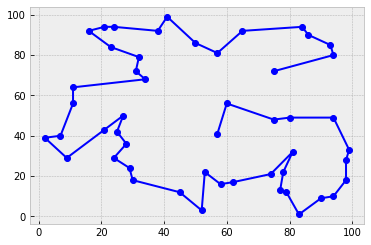

In [ ]:
env = Environment(map, num_creatures=100)
env.converge()

CONVERGING
FOUND SOLUTION:  (75, 72) (94, 80) (93, 85) (86, 90) (84, 94) (65, 92) (57, 81) (50, 86) (41, 99) (38, 92) (24, 94) (21, 94) (16, 92) (23, 84) (32, 79) (31, 72) (34, 68) (60, 56) (57, 41) (75, 48) (80, 49) (94, 49) (99, 33) (98, 28) (98, 18) (94, 10) (90, 9) (83, 1) (79, 12) (77, 13) (78, 22) (81, 32) (74, 21) (62, 17) (58, 16) (53, 22) (52, 3) (45, 12) (30, 18) (29, 24) (24, 29) (28, 36) (25, 42) (21, 43) (27, 50) (11, 64) (11, 56) (7, 40) (2, 39) (9, 29)
IN 2233 ITERATIONS
SCORE: 518.92
FINAL ITERATION: 3233


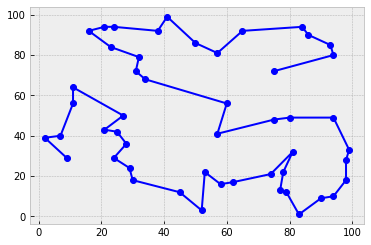

In [ ]:
env = Environment(map, num_creatures=200)
env.converge()

In [ ]:
for i in range(len(env.map_creatures)):
  print(env.map_creatures[i].score)

512.6180048361941
513.8009339232894
514.0638083522167
514.0638083522167
514.0638083522167
514.0820528243994
514.3347506671602
514.3347506671602
514.6822325078132
514.6822325078132
514.7496504917335
514.7871337332024
514.8490309196377
514.8490309196377
514.9227010805082
514.9227010805082
514.9312127520221
515.2467374393119
515.3242032734568
515.5176797542555
515.527856340422
515.527856340422
515.6493355471653
515.6493355471653
515.6493355471653
516.2136984799388
516.313078907843
516.7107854275172
517.2359089963362
517.2359089963362
517.6685007586447
519.1710431807941
521.4020692642376
521.5658664107051
522.8478727802602
523.8338638256284
524.21381431081
525.6201604886089
525.9543947267591
528.5131286744298
528.655454861214
528.9576622990002
529.3450695184283
530.5416815941338
540.336340191218
547.6139343758732
558.1629917090195
568.8805102850636
569.0064248964004
571.6740452104171
576.7048166607408
577.5301913687609
578.2833168114581
578.6474287116342
579.0261505434668
579.3835711223306